In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df_ad = pd.read_csv('ad.csv')
df_adtitle = pd.read_csv('ad_title.csv')

In [3]:
df_ad.head()

,adId,campaignId,advertiserId
0,7867,5918,8414
1,7866,5918,8414
2,7865,5918,8414
3,7863,8343,8414
4,7862,8343,8414


In [4]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 3 columns):
adId            3256 non-null int64
campaignId      3256 non-null int64
advertiserId    3256 non-null int64
dtypes: int64(3)
memory usage: 76.4 KB


In [5]:
df_ad['adId'].nunique()

3256

In [6]:
df_ad['campaignId'].nunique()

528

In [7]:
df_adtitle.head()

,adId,wordId
0,6,24
1,6,25
2,6,26
3,6,27
4,6,28


In [8]:
df_adtitle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18122 entries, 0 to 18121
Data columns (total 2 columns):
adId      18122 non-null int64
wordId    18122 non-null int64
dtypes: int64(2)
memory usage: 283.3 KB


In [9]:
df_adtitle['adId'].nunique()

3252

In [10]:
df_adtitle['wordId'].nunique()

2108

In [16]:
df_ad[df_ad['adId']==6639]

,adId,campaignId,advertiserId
1157,6639,1316,3096


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB0EB6B5C8>,
      dtype=object)

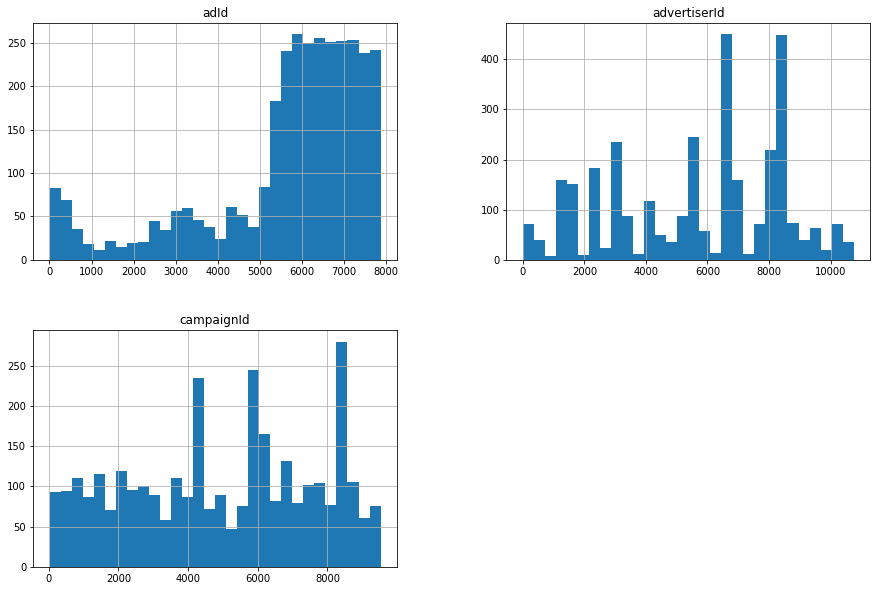

In [10]:
df_ad.hist(bins=30, figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB0F177208>,
      dtype=object)

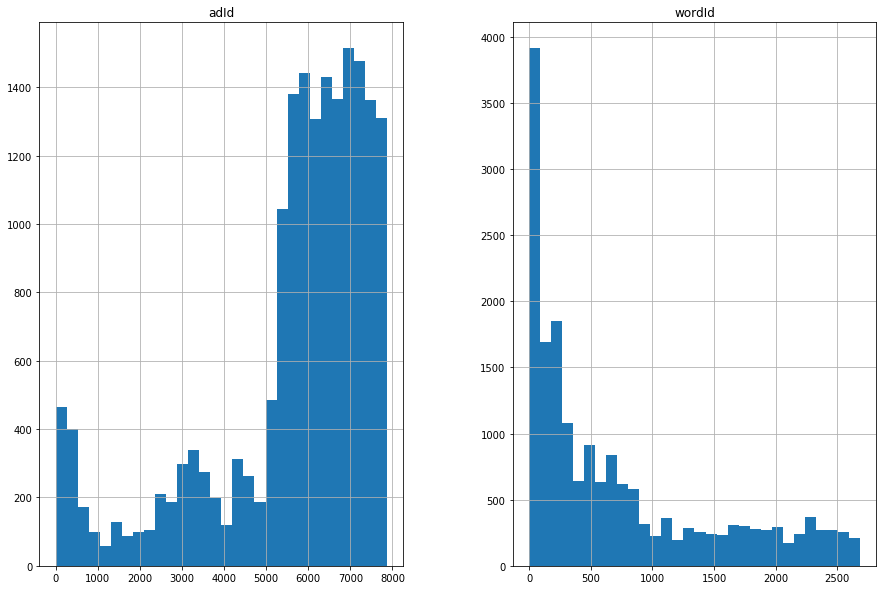

In [11]:
df_adtitle.hist(bins=30, figsize=(15, 10))

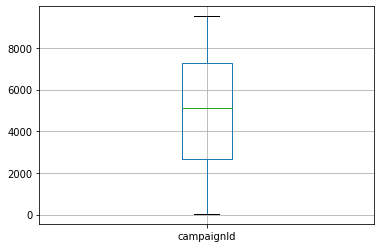

In [12]:
df_ad.boxplot(['campaignId'])

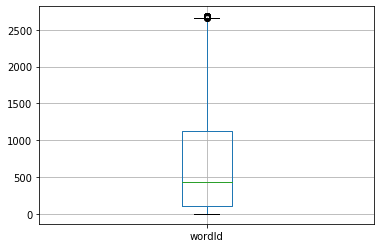

In [13]:
df_adtitle.boxplot(['wordId'])

In [14]:
X = df_ad.iloc[:, 0:2].values
Y = df_adtitle.iloc[:, 0:2].values

In [15]:
def group_data(X, clusters, k):
    n = X.shape[0]
    groups = [np.array([]) for _ in range(k)]
    for c in range(k):
        groups[c] = np.array([X[i] for i in range(n) if clusters[i] == c])
    return groups

def plot_clusters(X, clusters, centroids):
    k = centroids.shape[0]
    #color = ['lightseagreen','slateblue','slategray','lightcoral','lightgreen','']
    #labels = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5']
    groups = group_data(X, clusters, k)
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(groups[i][:,0], groups[i][:,1])
    plt.scatter(centroids[:,0], centroids[:, 1], marker='*', s=200, c='gold', label='Centroids')
    plt.xlabel('Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()


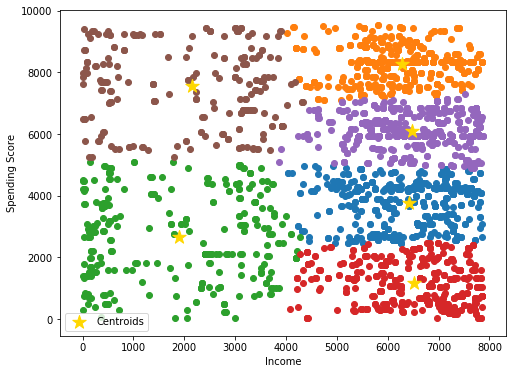

In [16]:
#********Just For Fun, Skip it*********
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=500, n_init=10)
pred_y = kmeans.fit_predict(X)
plot_clusters(X, pred_y, kmeans.cluster_centers_)

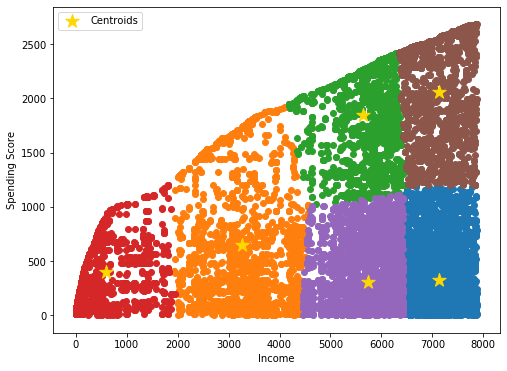

In [17]:
#********Just For Fun, Skip it*********
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=500, n_init=10)
pred_y = kmeans.fit_predict(Y)
plot_clusters(Y, pred_y, kmeans.cluster_centers_)

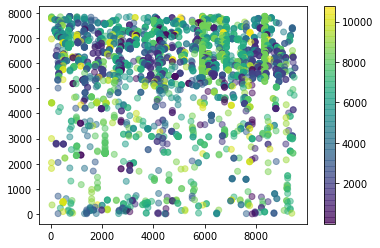

In [18]:
#********Just For Fun, Skip it*********
plt.scatter(x=df_ad['campaignId'], y=df_ad['adId'], c=df_ad['advertiserId'],alpha=0.5)
plt.colorbar()
plt.show()

In [19]:
#پیدا کردن تعداد تبلیغ های متعلق به هر کمپین
df_adg = df_ad.groupby(['campaignId']).agg({'adId':'count'}).reset_index()

In [20]:
df_adg.head(10)

,campaignId,adId
0,30,5
1,34,6
2,36,5
3,51,1
4,163,8
5,204,10
6,213,7
7,235,1
8,251,3
9,268,4


In [21]:
df_adg['adId'].max()

211

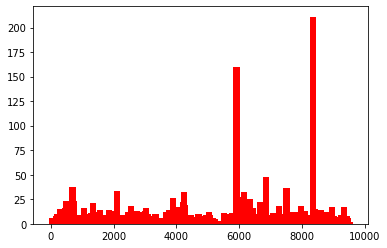

In [22]:
#نمودار تعداد تبلیغ های متعلق به هر کمپین، محور افقی کمپین
plt.bar(df_adg['campaignId'], df_adg['adId'], width=200, color='red')  
plt.show()

In [23]:
#پیدا کردن تعداد تبلیغ های متعلق به هر تبلیغ کننده
df_adg = df_ad.groupby(['advertiserId']).agg({'adId':'count'}).reset_index()

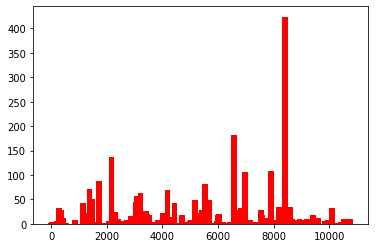

In [24]:
#نمودار تعداد تبلیغ های متعلق به هر تبلیغ کننده، محور افقی تبلیغ کننده
plt.bar(df_adg['advertiserId'], df_adg['adId'], width=200, color='red')
plt.show()

In [25]:
del(df_adg)

In [26]:
#پیدا کردن تعداد تبلیغ های متعلق به هر کلمه
df_adtitleg = df_adtitle.groupby(['wordId']).agg({'adId':'count'}).reset_index()

In [27]:
df_adtitleg.head(10)

,wordId,adId
0,0,11
1,1,65
2,3,11
3,4,9
4,5,35
5,6,12
6,7,1
7,8,39
8,9,67
9,10,3


In [28]:
df_adtitleg['adId'].max()

567

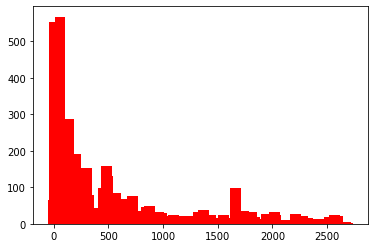

In [29]:
#نمودار تعداد تبلیغ های متعلق به هر کلمه، محور افقی کلمات
plt.bar(df_adtitleg['wordId'], df_adtitleg['adId'], width=100, color='red')
plt.show()

In [30]:
del(df_adtitleg)

In [31]:
vector = np.zeros((1,528), dtype = int)

In [3]:
#پیدا کردن تعداد کمپین هایی که هر تبلیغ عضو هست
df_adidg = df_ad.groupby(['adId']).agg({'campaignId':'count'}).reset_index()

In [4]:
df_adidg.head(10)

,adId,campaignId
0,6,1
1,7,1
2,8,1
3,11,1
4,13,1
5,14,1
6,15,1
7,17,1
8,18,1
9,19,1


In [6]:
df_adidg['campaignId'].max()

1

In [7]:
del(df_adidg)

In [8]:
#پیدا کردن تعداد کلماتی هایی که هر تبلیغ داره
df_adtg = df_adtitle.groupby(['adId']).agg({'wordId':'count'}).reset_index()
df_adtg.head(10)

,adId,wordId
0,6,8
1,7,4
2,8,7
3,11,7
4,13,10
5,14,8
6,15,6
7,17,5
8,18,5
9,19,7


In [9]:
df_adtg['wordId'].max()

11

In [10]:
df_adtg['wordId'].min()

1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000194F7F3D0C8>,
      dtype=object)

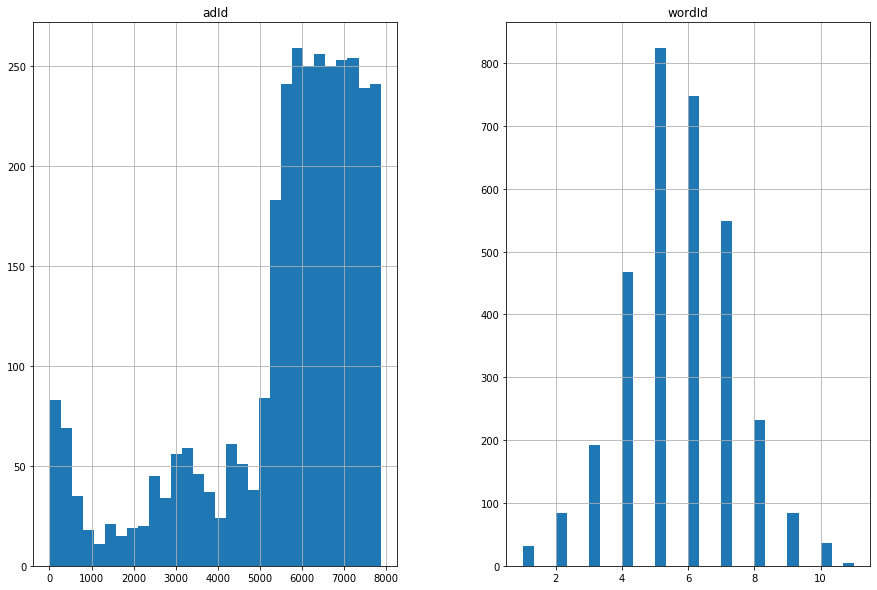

In [13]:
df_adtg.hist(bins=30, figsize=(15, 10))